<a href="https://colab.research.google.com/github/RODRIGORUBIO1991/PythonCode/blob/main/IT%20SALARIOS/IT_Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Análisis Comparativo de Argentina en los Juegos Olímpicos 🏅 <h1>


# Introducción

Este análisis se basa en una exhaustiva recopilación de datos históricos de los Juegos Olímpicos, desde su inicio en 1896 hasta los últimos juegos en 2022. Utilizando esta base de datos como referencia, se ha llevado a cabo un análisis comparativo entre Argentina, Colombia, Brasil, España y México, países seleccionados por su importancia en el ámbito deportivo y su relevancia cultural e histórica.

Argentina, Colombia, Brasil, España y México son seleccionados por ser los principales países hispanohablantes, con Brasil incluido debido a su histórica rivalidad deportiva y su prominencia en el escenario olímpico.

Este análisis no solo se centra en comparar los resultados generales de estos países a lo largo de la historia olímpica, sino que también se profundiza en un análisis más detallado de los últimos 20 años, desde los Juegos Olímpicos de Atenas 2004 hasta la actualidad. Este enfoque temporal más reciente permite observar tendencias y patrones más relevantes en el rendimiento deportivo de estos países en la era moderna.

Es importante destacar que, además de comparar resultados deportivos, se considerarán otros factores relevantes como el tamaño de la población y el contexto socioeconómico de cada país. En particular, se hace hincapié en que España y Colombia poseen una población semejante a la de Argentina, lo que proporciona un marco interesante para analizar y comparar el desempeño deportivo en relación con la base poblacional.

Este análisis no solo busca ofrecer una visión general del rendimiento olímpico de estos países, sino también profundizar en los factores que pueden influir en su éxito o fracaso en el ámbito deportivo.

¡Espero que este análisis comparativo arroje luz sobre el desempeño deportivo de Argentina, Colombia, Brasil, España y México en los Juegos Olímpicos y genere interesantes reflexiones sobre el panorama deportivo internacional!

# Librerias y Carga de Datos 📁

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker

from warnings import filterwarnings
filterwarnings(action='ignore', category=FutureWarning)

# Cargar el archivo CSV
df = pd.read_csv('olympic_medals.csv')
df = df[df['Olympic_season'] == 'summer']


print(df.head())
print(df.info())



      Olympiad           Discipline                       Event  \
0  Athina 1896  Artistic Gymnastics         Horizontal Bar, Men   
1  Athina 1896  Artistic Gymnastics         Horizontal Bar, Men   
2  Athina 1896  Artistic Gymnastics  Horizontal Bar, Teams, Men   
3  Athina 1896  Artistic Gymnastics            Horse Vault, Men   
4  Athina 1896  Artistic Gymnastics            Horse Vault, Men   

                Winner Medal_type Olympic_city  Olympic_year Olympic_season  \
0  Hermann Weingärtner       Gold       Athens          1896         summer   
1        Alfred Flatow     Silver       Athens          1896         summer   
2              Germany       Gold       Athens          1896         summer   
3  Hermann Weingärtner     Bronze       Athens          1896         summer   
4       Carl Schuhmann       Gold       Athens          1896         summer   

  Gender Code Committee Committee_type  
0    Men  GER   Germany        Country  
1    Men  GER   Germany        Country  

In [7]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Contar la cantidad de medallas por Committee y año
medallas_por_ano_committee = df_verano.groupby(['Olympic_year', 'Committee'])['Medal_type'].count().reset_index()
medallas_por_ano_committee.columns = ['Año', 'Committee', 'Cantidad de Medallas']

# Paso 3: Filtrar para obtener solo los top 10 Committees con mayor cantidad de medallas en total
top_10_committees_total = df_verano.groupby('Committee')['Medal_type'].count().nlargest(10).index
medallas_top_10 = medallas_por_ano_committee[medallas_por_ano_committee['Committee'].isin(top_10_committees_total)]

# Crear un DataFrame con todos los años y comités para asegurarnos de que cada comité esté presente en cada año
all_years = medallas_top_10['Año'].unique()
all_committees = medallas_top_10['Committee'].unique()
all_combinations = pd.MultiIndex.from_product([all_years, all_committees], names=['Año', 'Committee'])
medallas_top_10 = medallas_top_10.set_index(['Año', 'Committee']).reindex(all_combinations, fill_value=0).reset_index()

# Paso 4: Crear el DataFrame acumulativo
medallas_top_10['Cantidad Acumulada'] = medallas_top_10.groupby('Committee')['Cantidad de Medallas'].cumsum()

# Paso 5: Crear el gráfico de barras animado horizontal
fig = px.bar(medallas_top_10, x='Cantidad Acumulada', y='Committee', color='Committee', 
             animation_frame='Año', animation_group='Committee',
             title='Evolución Acumulativa de las Medallas de los Top 10',
             labels={'Cantidad Acumulada': 'Cantidad Acumulada de Medallas'},
             range_x=[0, medallas_top_10['Cantidad Acumulada'].max() + 20],
             template='plotly_dark', orientation='h')

# Ajustar el diseño para asegurar que se muestren todos los comités en orden de cantidad acumulada
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)

# Mostrar el gráfico
fig.show()


In [9]:
import plotly.express as px


# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Contar la cantidad de medallas por Committee y año
medallas_por_ano_committee = df_verano.groupby(['Olympic_year', 'Committee'])['Medal_type'].count().reset_index()
medallas_por_ano_committee.columns = ['Año', 'Committee', 'Cantidad de Medallas']

# Paso 3: Filtrar para obtener solo los top 10 Committees con mayor cantidad de medallas en total
top_10_committees_total = df_verano.groupby('Committee')['Medal_type'].count().nlargest(10).index
medallas_top_10 = medallas_por_ano_committee[medallas_por_ano_committee['Committee'].isin(top_10_committees_total)]

# Crear un DataFrame con todos los años y comités para asegurarnos de que cada comité esté presente en cada año
all_years = medallas_top_10['Año'].unique()
all_committees = medallas_top_10['Committee'].unique()
all_combinations = pd.MultiIndex.from_product([all_years, all_committees], names=['Año', 'Committee'])
medallas_top_10 = medallas_top_10.set_index(['Año', 'Committee']).reindex(all_combinations, fill_value=0).reset_index()

# Paso 4: Crear el DataFrame acumulativo
medallas_top_10['Cantidad Acumulada'] = medallas_top_10.groupby('Committee')['Cantidad de Medallas'].cumsum()

# Paso 5: Crear el gráfico de barras animado horizontal
fig = px.bar(medallas_top_10, x='Cantidad Acumulada', y='Committee', color='Committee', 
             animation_frame='Año', animation_group='Committee',
             title='Evolución Acumulativa de las Medallas de los Top 10',
             labels={'Cantidad Acumulada': 'Cantidad Acumulada de Medallas'},
             range_x=[0, medallas_top_10['Cantidad Acumulada'].max() + 20],
             template='plotly_dark', orientation='h')

# Ajustar el diseño para asegurar que se muestren todos los comités en orden de cantidad acumulada
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, showlegend=False)

# Mostrar el gráfico
fig.show()

# Guardar el gráfico como HTML
fig.write_html("medallas_top_10.html")


In [8]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Calcular la cantidad de medallas por Committee
medallas_por_committee = df_verano.groupby('Committee')['Medal_type'].count().reset_index()
medallas_por_committee.columns = ['Committee', 'Cantidad de Medallas']

# Paso 3: Seleccionar los 10 Committees con mayor cantidad de medallas
top_10_committees = medallas_por_committee.nlargest(10, 'Cantidad de Medallas')

# Paso 4: Crear el gráfico interactivo con Plotly
fig = px.bar(top_10_committees, x='Committee', y='Cantidad de Medallas', 
             title='Top 10 Committees con Mayor Cantidad de Medallas',
             labels={'Cantidad de Medallas': 'Cantidad de Medallas'},
             template='plotly_dark')

# Mostrar el gráfico
fig.show()

<Figure size 864x432 with 0 Axes>

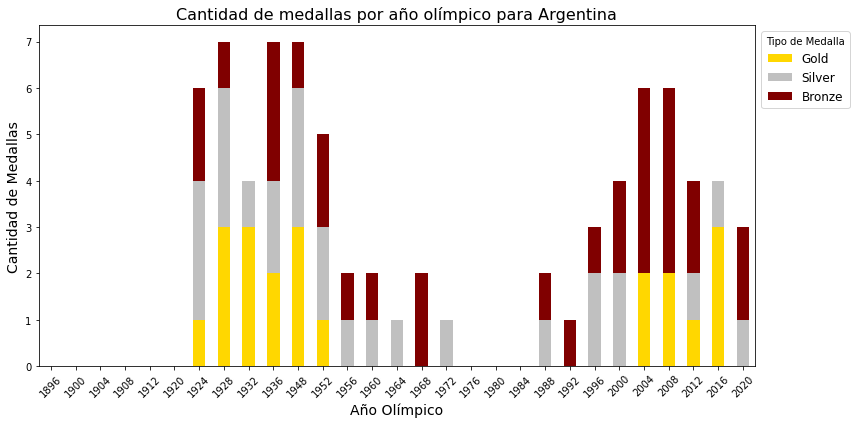

<Figure size 864x432 with 0 Axes>

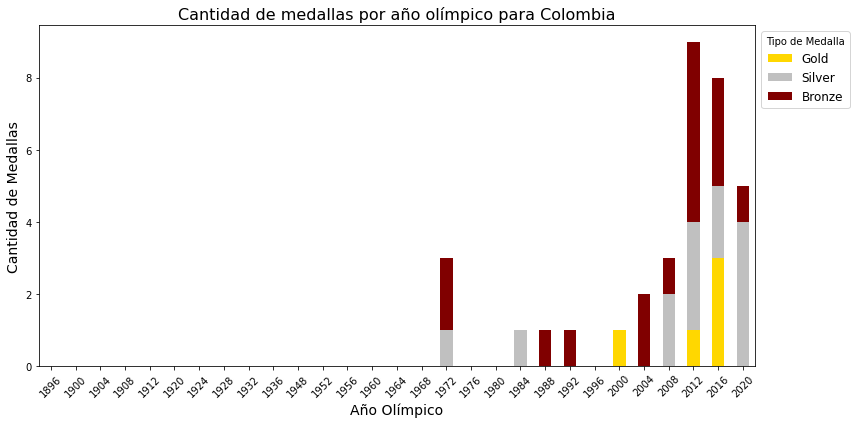

<Figure size 864x432 with 0 Axes>

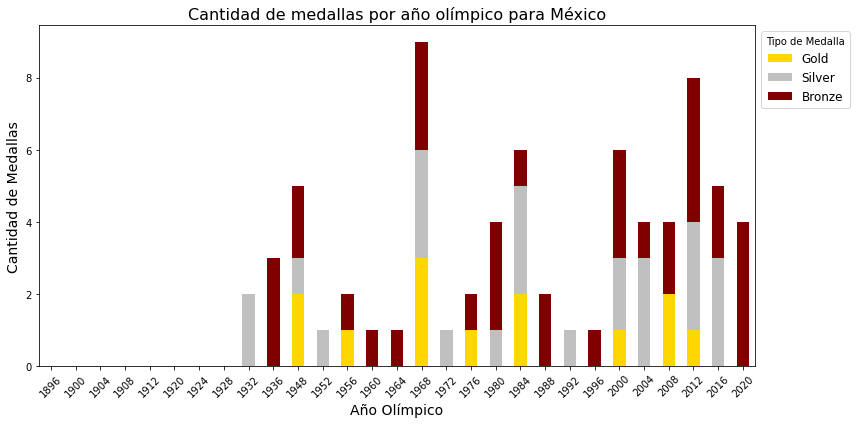

<Figure size 864x432 with 0 Axes>

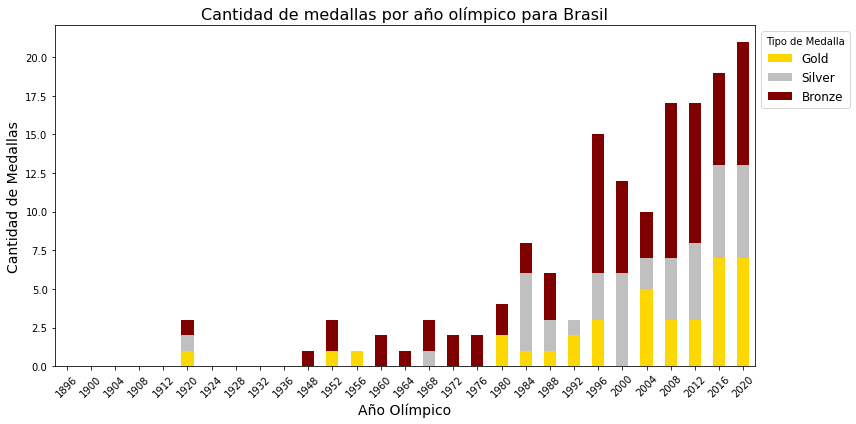

<Figure size 864x432 with 0 Axes>

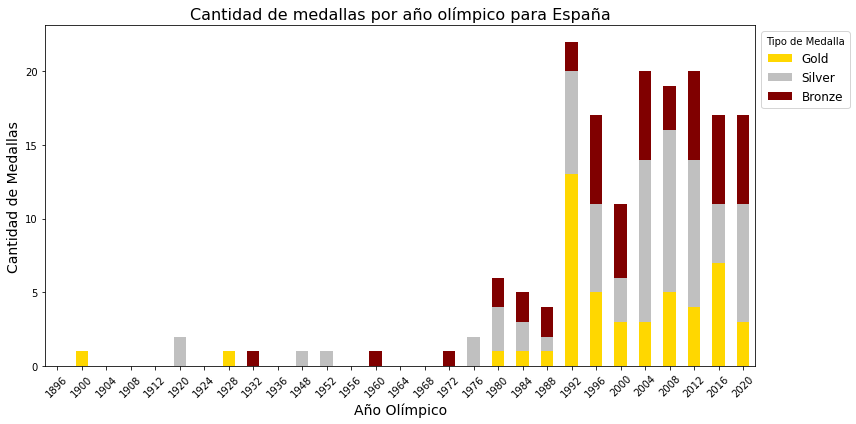

In [2]:

# Crear un DataFrame para cada país
df_argentina = df[df['Committee'] == 'Argentina']
df_colombia = df[df['Committee'] == 'Colombia']
df_mexico = df[df['Committee'] == 'Mexico']
df_brasil = df[df['Committee'] == 'Brazil']
df_espana = df[df['Committee'] == 'Spain']

# Encontrar todos los años en los que se celebraron los Juegos Olímpicos
all_olympic_years = df['Olympic_year'].unique()

# Función para generar gráfico para un país dado
def generar_grafico(df, nombre_pais):
    # Encontrar los años en los que el país ganó medallas
    pais_medal_years = df['Olympic_year'].unique()
    
    # Combinar ambas listas para obtener todos los años de los Juegos Olímpicos para el país
    all_years = sorted(set(all_olympic_years) | set(pais_medal_years))
    
    # Sumar el número total de medallas para cada año y tipo de medalla
    df_pais_grouped = df.groupby(['Olympic_year', 'Medal_type']).size().unstack(fill_value=0)
    
    # Reindexar para incluir todos los años de los Juegos Olímpicos para el país
    df_pais_grouped = df_pais_grouped.reindex(all_years, fill_value=0)
    
    # Definir colores personalizados
    colors = ['#FFD700', '#C0C0C0', '#800000']  # Dorado, Plateado, Bronce
    
    # Crear un gráfico de barras utilizando Seaborn
    plt.figure(figsize=(12, 6))
    df_pais_grouped[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors, figsize=(12,6))
    plt.title(f'Cantidad de medallas por año olímpico para {nombre_pais}', fontsize=16)
    plt.xlabel('Año Olímpico', fontsize=14)
    plt.ylabel('Cantidad de Medallas', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Medalla', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Generar gráficos para cada país
generar_grafico(df_argentina, 'Argentina')
generar_grafico(df_colombia, 'Colombia')
generar_grafico(df_mexico, 'México')
generar_grafico(df_brasil, 'Brasil')
generar_grafico(df_espana, 'España')

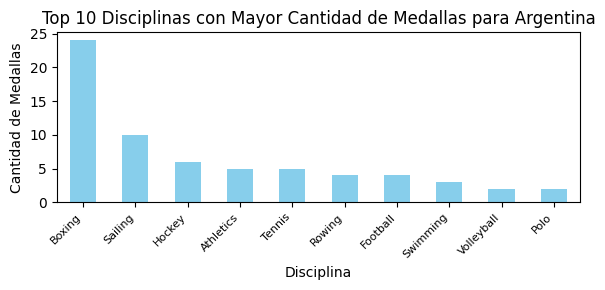

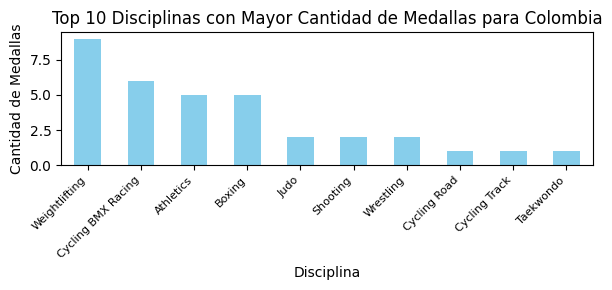

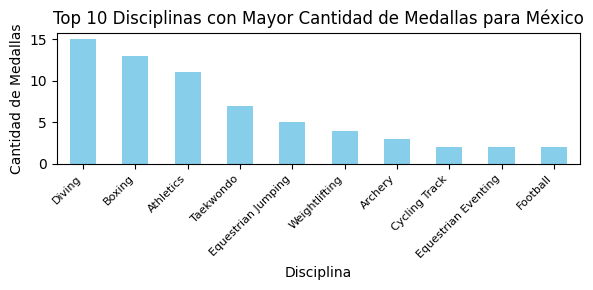

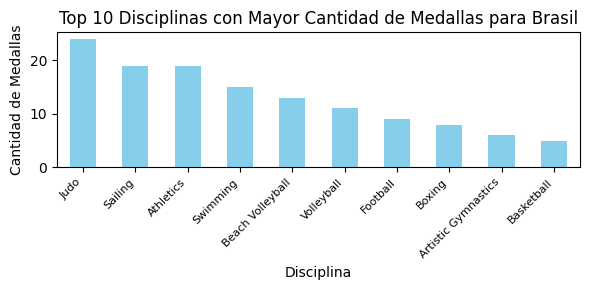

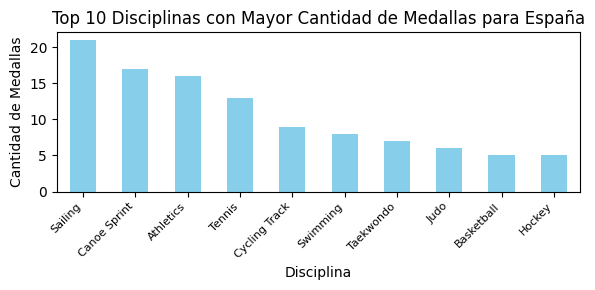

In [5]:
# Crear un DataFrame para cada país
df_argentina = df[df['Committee'] == 'Argentina']
df_colombia = df[df['Committee'] == 'Colombia']
df_mexico = df[df['Committee'] == 'Mexico']
df_brasil = df[df['Committee'] == 'Brazil']
df_espana = df[df['Committee'] == 'Spain']

# Función para generar gráfico para un país dado
def generar_grafico_disciplinas(df, nombre_pais):
    # Contar el número total de medallas por disciplina
    df_discipline_counts = df.groupby('Discipline')['Medal_type'].count().sort_values(ascending=False)
    
    # Obtener las 10 disciplinas con mayor cantidad de medallas
    top_disciplines = df_discipline_counts.head(10)
    
    # Crear un gráfico de barras
    plt.figure(figsize=(6, 3))  # Tamaño ajustado a la mitad
    top_disciplines.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Disciplinas con Mayor Cantidad de Medallas para {nombre_pais}', fontsize=12)  # Título más pequeño
    plt.xlabel('Disciplina', fontsize=10)  # Etiquetas más pequeñas
    plt.ylabel('Cantidad de Medallas', fontsize=10)  # Etiquetas más pequeñas
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotación y tamaño de etiquetas ajustados
    plt.tight_layout()
    plt.show()

# Generar gráficos para cada país
generar_grafico_disciplinas(df_argentina, 'Argentina')
generar_grafico_disciplinas(df_colombia, 'Colombia')
generar_grafico_disciplinas(df_mexico, 'México')
generar_grafico_disciplinas(df_brasil, 'Brasil')
generar_grafico_disciplinas(df_espana, 'España')


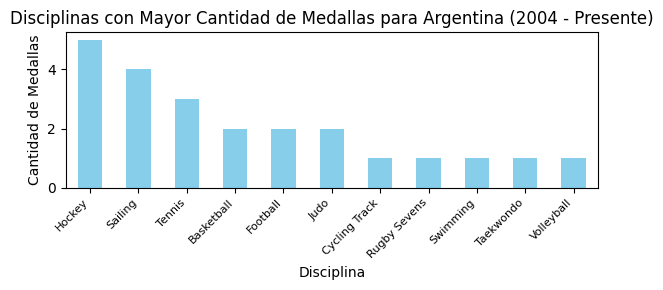

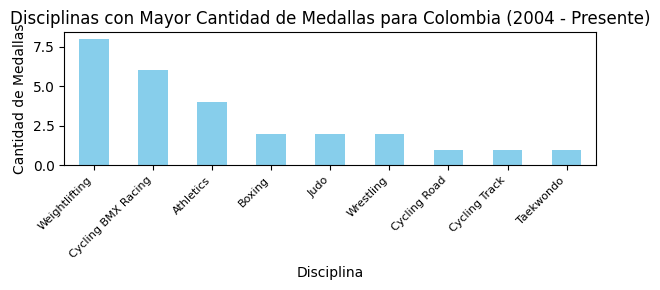

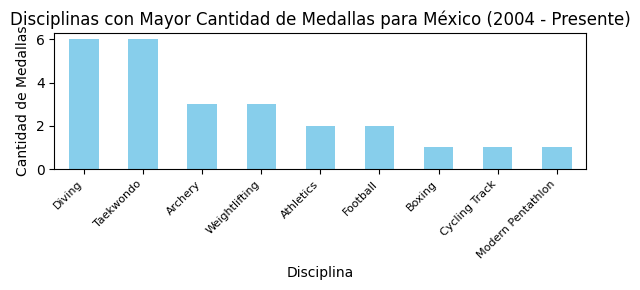

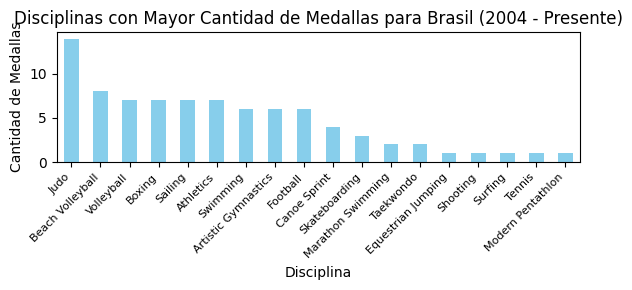

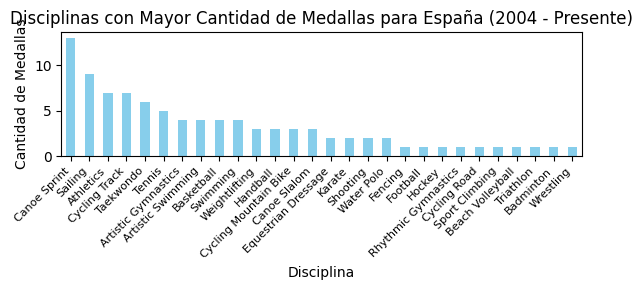

In [10]:

# Filtrar por el Committee de Argentina y por los años desde 2004 hasta la fecha actual
df_argentina_recent = df[(df['Committee'] == 'Argentina') & (df['Olympic_year'] >= 2004)]
df_colombia_recent = df[(df['Committee'] == 'Colombia') & (df['Olympic_year'] >= 2004)]
df_mexico_recent = df[(df['Committee'] == 'Mexico') & (df['Olympic_year'] >= 2004)]
df_brasil_recent = df[(df['Committee'] == 'Brazil') & (df['Olympic_year'] >= 2004)]
df_espana_recent = df[(df['Committee'] == 'Spain') & (df['Olympic_year'] >= 2004)]

# Función para generar gráfico para un país dado
def generar_grafico_disciplinas_recent(df, nombre_pais):
    # Contar el número total de medallas por disciplina
    df_discipline_counts = df.groupby('Discipline')['Medal_type'].count().sort_values(ascending=False)
    
    # Crear un gráfico de barras
    plt.figure(figsize=(6, 3))  # Tamaño ajustado a la mitad
    df_discipline_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Disciplinas con Mayor Cantidad de Medallas para {nombre_pais} (2004 - Presente)', fontsize=12)  # Título más pequeño
    plt.xlabel('Disciplina', fontsize=10)  # Etiquetas más pequeñas
    plt.ylabel('Cantidad de Medallas', fontsize=10)  # Etiquetas más pequeñas
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotación y tamaño de etiquetas ajustados
    plt.tight_layout()
    plt.show()

# Generar gráficos para cada país
generar_grafico_disciplinas_recent(df_argentina_recent, 'Argentina')
generar_grafico_disciplinas_recent(df_colombia_recent, 'Colombia')
generar_grafico_disciplinas_recent(df_mexico_recent, 'México')
generar_grafico_disciplinas_recent(df_brasil_recent, 'Brasil')
generar_grafico_disciplinas_recent(df_espana_recent, 'España')

Argentina: A lo largo de su historia olímpica, Argentina ha experimentado altibajos en su desempeño. 
En las décadas del 20, 30 y 40 del siglo pasado, el país tuvo resultados excepcionales para una nación de América Latina.
Sin embargo, a partir de la década del 50, Argentina experimentó un período de declive en su rendimiento olímpico, que recién comenzó a revertirse en 1996. En los Juegos de 2004 y 2008, el país obtuvo sus mejores resultados en las últimas décadas. Sin embargo, en los últimos años, Argentina ha mostrado un estancamiento con una tendencia a la baja en sus resultados olímpicos. 
Es importante destacar que la mayoría de las medallas argentinas en las últimas décadas se han obtenido en deportes grupales. 

Colombia: Aunque Colombia no ha tenido un historial tan extenso en los Juegos Olímpicos, ha mostrado un crecimiento significativo en los últimos años. 
Su enfoque principal ha sido en deportes como el ciclismo, el atletismo y el levantamiento de pesas. 



México: México ha tenido una presencia constante en los Juegos Olímpicos, destacándose en deportes como el boxeo, el taekwondo y el clavado. A lo largo de los años, ha mostrado una mejora en su desempeño, con una destacada actuación en los Juegos de 1968, cuando fueron los anfitriones. 

Brasil es conocido por su pasión por el fútbol, pero también ha tenido un éxito notable en otros deportes como la vela, el voleibol y el judo. 
Ha sido anfitrión de los Juegos Olímpicos en 2016, lo que le proporcionó una plataforma para mostrar sus logros deportivos y culturales a nivel mundial.  
La política deportiva brasileña ha estado estrechamente asociada con la mejora constante que ha experimentado el país en las últimas tres décadas. 
A pesar de los inconvenientes políticos que ha enfrentado, Brasil ha logrado crecer con gobiernos de distintos signos políticos, y su mejora en el ámbito deportivo ha sido constante. 
Este crecimiento sostenido ha llevado a Brasil a convertirse en la principal potencia deportiva de América Latina en los Juegos Olímpicos. La inversión en infraestructura deportiva, el apoyo a los atletas y el desarrollo de programas de detección y entrenamiento de talentos han sido elementos clave en el ascenso de Brasil como potencia deportiva regional.


España: España ha disfrutado de un éxito considerable en los Juegos Olímpicos en las últimas décadas. Su punto culminante fue en los Juegos de Barcelona 1992, donde obtuvo un impresionante número de medallas y logró proyectar una imagen de modernidad y desarrollo al mundo.

Sin embargo, es importante destacar que España tuvo un desempeño menos destacado en los Juegos Olímpicos anteriores a Barcelona 1992. Durante el período del franquismo, la política deportiva no fue exitosa y el país no logró alcanzar los resultados esperados en el ámbito olímpico. Los Juegos Olímpicos de Barcelona fueron fundamentales para cambiar esta tendencia.

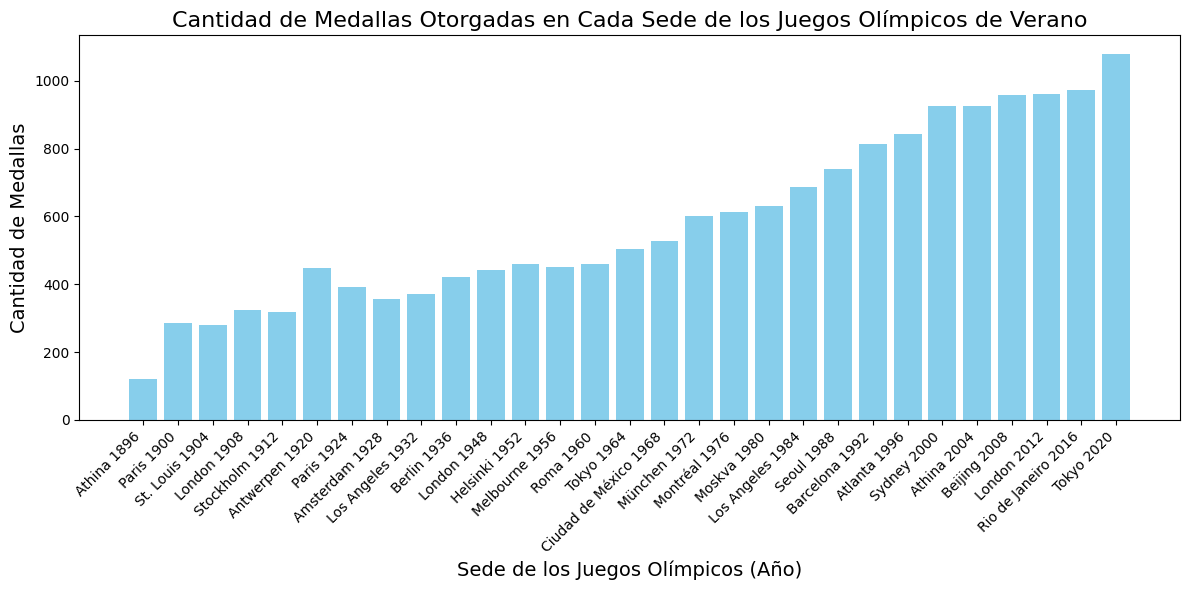

In [7]:

# Paso 1: Filtrar los datos para incluir solo los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Eliminar "Stockholm 1956"
df_verano = df_verano[df_verano['Olympiad'] != 'Stockholm 1956']

# Paso 3: Identificar las sedes de los Juegos Olímpicos
sedes = df_verano['Olympiad'].unique()

# Paso 4: Contar la cantidad de medallas otorgadas en cada sede
medallas_por_sede = df_verano.groupby('Olympiad')['Medal_type'].count().reset_index()
medallas_por_sede.columns = ['Olympiad', 'Cantidad de Medallas']

# Paso 5: Extraer el año de la Olimpiada para ordenar cronológicamente
medallas_por_sede['Año'] = medallas_por_sede['Olympiad'].str.extract(r'(\d{4})').astype(int)

# Ordenar los datos en orden cronológico
medallas_por_sede = medallas_por_sede.sort_values(by='Año')

# Paso 6: Graficar los datos
plt.figure(figsize=(12, 6))
plt.bar(medallas_por_sede['Olympiad'], medallas_por_sede['Cantidad de Medallas'], color='skyblue')
plt.title('Cantidad de Medallas Otorgadas en Cada Sede de los Juegos Olímpicos de Verano', fontsize=16)
plt.xlabel('Sede de los Juegos Olímpicos (Año)', fontsize=14)
plt.ylabel('Cantidad de Medallas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se puede contemplar como fue aumentando progresivamente la cantidad de medallas otorgadas.

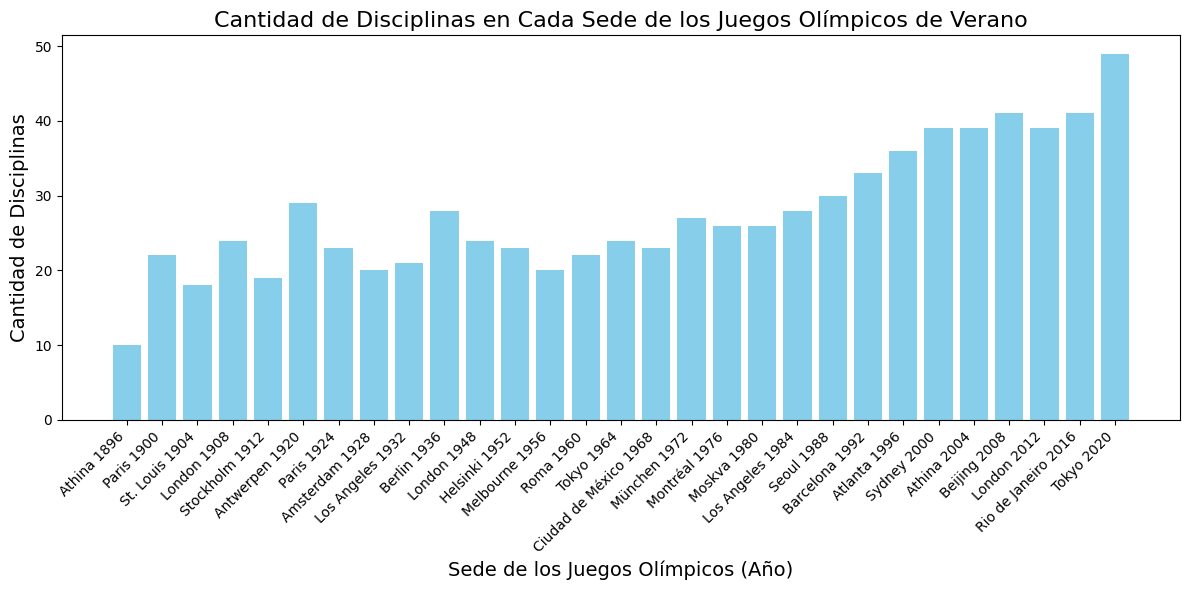

In [8]:

# Paso 1: Filtrar los datos para incluir solo los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Eliminar "Stockholm 1956"
df_verano = df_verano[df_verano['Olympiad'] != 'Stockholm 1956']

# Paso 3: Identificar las sedes de los Juegos Olímpicos
sedes = df_verano['Olympiad'].unique()

# Paso 4: Contar la cantidad de disciplinas únicas en cada sede
disciplinas_por_sede = df_verano.groupby('Olympiad')['Discipline'].nunique().reset_index()
disciplinas_por_sede.columns = ['Olympiad', 'Cantidad de Disciplinas']

# Paso 5: Extraer el año de la Olimpiada para ordenar cronológicamente
disciplinas_por_sede['Año'] = disciplinas_por_sede['Olympiad'].str.extract(r'(\d{4})').astype(int)

# Ordenar los datos en orden cronológico
disciplinas_por_sede = disciplinas_por_sede.sort_values(by='Año')

# Paso 6: Graficar los datos
plt.figure(figsize=(12, 6))
plt.bar(disciplinas_por_sede['Olympiad'], disciplinas_por_sede['Cantidad de Disciplinas'], color='skyblue')
plt.title('Cantidad de Disciplinas en Cada Sede de los Juegos Olímpicos de Verano', fontsize=16)
plt.xlabel('Sede de los Juegos Olímpicos (Año)', fontsize=14)
plt.ylabel('Cantidad de Disciplinas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se puede observar un aumento de las últimas 3 décadas de la cantidad de disciplinas. 

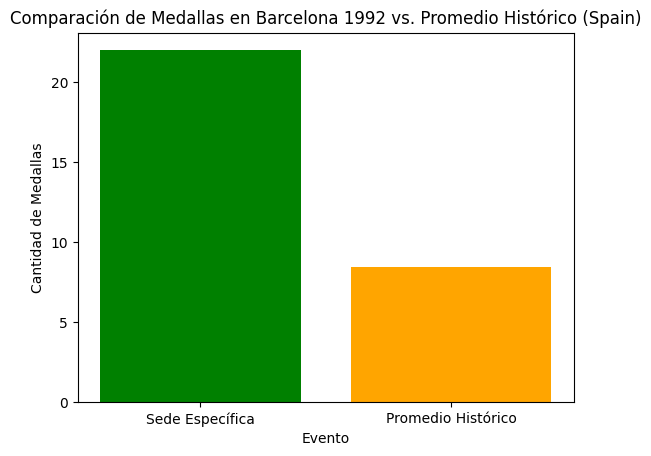

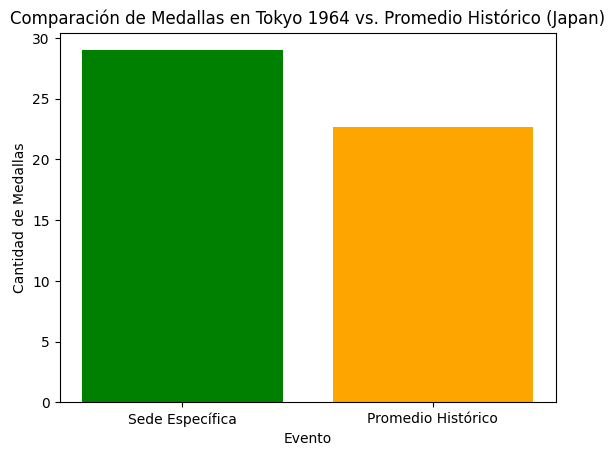

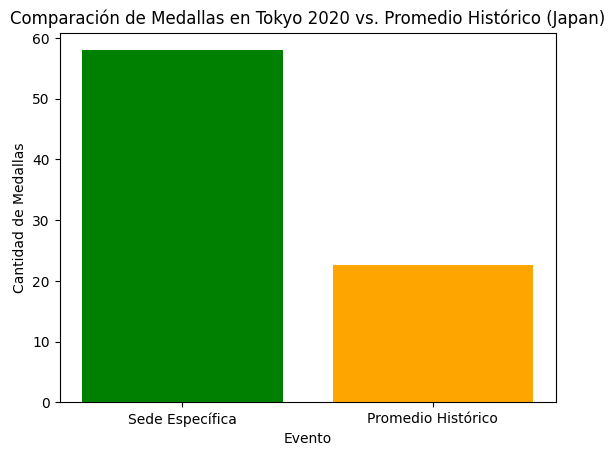

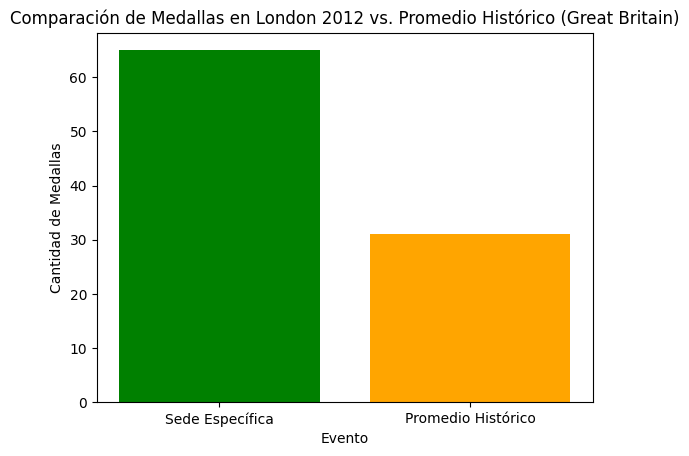

In [16]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Crear una lista de tuplas con los datos de cada comparación
comparaciones = [
    ('Spain', 'Barcelona 1992'),
    ('Japan', 'Tokyo 1964'),
    ('Japan', 'Tokyo 2020'),
    ('Great Britain', 'London 2012')
]

# Función para realizar la comparación y mostrar el gráfico
def comparar_medallas_olimpicas(dataframe, committee, olympiad):
    # Filtrar el DataFrame para incluir solo los datos del país y la sede específica
    df_olympiad = dataframe[(dataframe['Committee'] == committee) & (dataframe['Olympiad'] == olympiad)]
    
    # Calcular el número de medallas obtenidas en la sede específica
    medallas_olympiad = df_olympiad['Medal_type'].count()
    
    # Calcular el promedio histórico de medallas para el país
    df_committee_historico = dataframe[dataframe['Committee'] == committee]
    medallas_historicas_committee = df_committee_historico['Medal_type'].count()
    cantidad_olimpiadas_committee = df_committee_historico['Olympiad'].nunique()
    promedio_historico_committee = medallas_historicas_committee / cantidad_olimpiadas_committee
    
    # Crear un gráfico comparativo
    plt.bar(['Sede Específica', 'Promedio Histórico'], [medallas_olympiad, promedio_historico_committee], color=['green', 'orange'])
    plt.title(f'Comparación de Medallas en {olympiad} vs. Promedio Histórico ({committee})')
    plt.xlabel('Evento')
    plt.ylabel('Cantidad de Medallas')
    plt.show()

# Iterar sobre la lista de comparaciones y llamar a la función para cada una
for committee, olympiad in comparaciones:
    comparar_medallas_olimpicas(df_verano, committee, olympiad)

In [11]:

# Obtener la lista única de Comités Olímpicos
comites_olimpicos = df['Committee'].unique()

# Mostrar la lista de Comités Olímpicos
print("Listado de Comités Olímpicos:")
for comite in comites_olimpicos:
    print(comite)

Listado de Comités Olímpicos:
Germany
Switzerland
Greece
France
Australia
United States
Hungary
Great Britain
Austria
Denmark
Mixed-NOCs
Belgium
India
Bohemia
Sweden
Norway
Spain
Italy
Cuba
Netherlands
Canada
Finland
South Africa
Australasia
Russia
Estonia
Czechoslovakia
New Zealand
Brazil
Japan
Luxembourg
Monaco
Ireland
Yugoslavia
Argentina
Poland
Portugal
Uruguay
Romania
Haiti
Chile
Egypt
Philippines
Latvia
Mexico
Turkey
Panama
Sri Lanka
Jamaica
Puerto Rico
South Korea
Peru
Iran
Trinidad and Tobago
Soviet Union
Venezuela
Bulgaria
Lebanon
Iceland
Pakistan
Bahamas
West Indies Federation
Chinese Taipei
Ethiopia
Morocco
Ghana
Iraq
Singapore
Tunisia
Kenya
Nigeria
East Germany
West Germany
Uganda
Cameroon
Mongolia
Colombia
North Korea
Niger
Bermuda
Thailand
Tanzania
Guyana
Zimbabwe
China
Ivory Coast
Dominican Republic
Zambia
Algeria
Syria
Indonesia
Senegal
Djibouti
Virgin Islands
Netherlands Antilles
Suriname
Costa Rica
Unified Team
Qatar
Namibia
Lithuania
Malaysia
Croatia
Israel
Slovenia


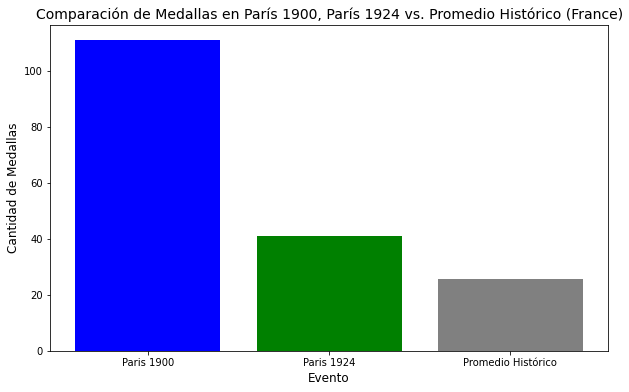

In [3]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de París 1900 y París 1924
df_paris_1900 = df_verano[(df_verano['Olympiad'] == 'Paris 1900') & (df_verano['Committee'] == 'France')]
df_paris_1924 = df_verano[(df_verano['Olympiad'] == 'Paris 1924') & (df_verano['Committee'] == 'France')]

# Paso 3: Calcular el número de medallas que obtuvo France en París 1900 y París 1924
medallas_paris_1900 = df_paris_1900['Medal_type'].count()
medallas_paris_1924 = df_paris_1924['Medal_type'].count()

# Paso 4: Calcular el promedio histórico de medallas para France
olympiadas_unicas = df_verano['Olympiad'].nunique()
medallas_totales_france = df_verano[df_verano['Committee'] == 'France']['Medal_type'].count()
promedio_historico_france = medallas_totales_france / olympiadas_unicas

# Paso 5: Crear un gráfico comparando las medallas obtenidas en París 1900 y París 1924 con el promedio histórico
plt.figure(figsize=(10, 6))
plt.bar(['Paris 1900', 'Paris 1924', 'Promedio Histórico'], 
        [medallas_paris_1900, medallas_paris_1924, promedio_historico_france], color=['blue', 'green', 'gray'])
plt.title('Comparación de Medallas en París 1900, París 1924 vs. Promedio Histórico (France)', fontsize=14)
plt.xlabel('Evento', fontsize=12)
plt.ylabel('Cantidad de Medallas', fontsize=12)
plt.show()

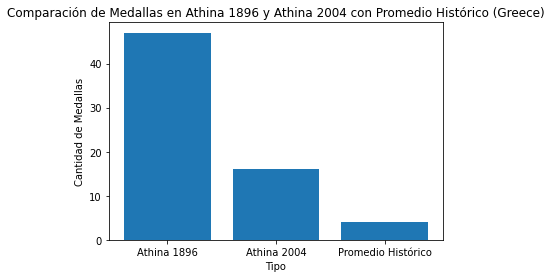

In [4]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de 1896 y 2004 en Athina
df_athina_1896 = df_verano[(df_verano['Olympiad'] == 'Athina 1896') & (df_verano['Committee'] == 'Greece')]
df_athina_2004 = df_verano[(df_verano['Olympiad'] == 'Athina 2004') & (df_verano['Committee'] == 'Greece')]

# Paso 3: Calcular el número de medallas que obtuvo Greece en Athina 1896 y Athina 2004
medallas_athina_1896 = df_athina_1896['Medal_type'].count()
medallas_athina_2004 = df_athina_2004['Medal_type'].count()

# Paso 4: Calcular el promedio histórico de medallas para Greece
promedio_historico_greece = df_verano[df_verano['Committee'] == 'Greece']['Medal_type'].count() / df_verano['Olympiad'].nunique()

# Paso 5: Crear un gráfico comparando las medallas obtenidas en Athina 1896, Athina 2004 y el promedio histórico
plt.bar(['Athina 1896', 'Athina 2004', 'Promedio Histórico'], [medallas_athina_1896, medallas_athina_2004, promedio_historico_greece])
plt.title('Comparación de Medallas en Athina 1896 y Athina 2004 con Promedio Histórico (Greece)')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de Medallas')
plt.show()

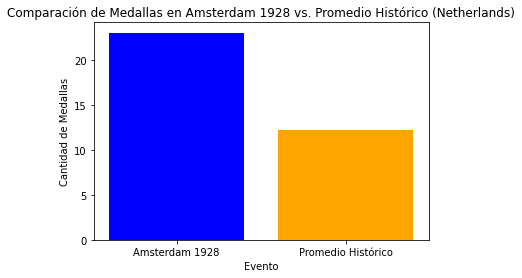

In [5]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de 1928 en Ámsterdam
df_amsterdam_1928 = df_verano[(df_verano['Olympiad'] == 'Amsterdam 1928') & (df_verano['Committee'] == 'Netherlands')]

# Paso 3: Calcular el número de medallas que obtuvo Netherlands en Ámsterdam 1928
medallas_amsterdam_1928 = df_amsterdam_1928['Medal_type'].count()

# Paso 4: Calcular el promedio histórico de medallas para Netherlands
# Excluyendo los juegos de Ámsterdam 1928 para un promedio preciso
df_netherlands_historico = df_verano[(df_verano['Committee'] == 'Netherlands') & (df_verano['Olympiad'] != 'Amsterdam 1928')]
medallas_historicas_netherlands = df_netherlands_historico['Medal_type'].count()
cantidad_olimpiadas_netherlands = df_netherlands_historico['Olympiad'].nunique()
promedio_historico_netherlands = medallas_historicas_netherlands / cantidad_olimpiadas_netherlands

# Paso 5: Crear un gráfico comparando las medallas obtenidas en Ámsterdam 1928 con el promedio histórico
plt.bar(['Amsterdam 1928', 'Promedio Histórico'], [medallas_amsterdam_1928, promedio_historico_netherlands], color=['blue', 'orange'])
plt.title('Comparación de Medallas en Amsterdam 1928 vs. Promedio Histórico (Netherlands)')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Medallas')
plt.show()

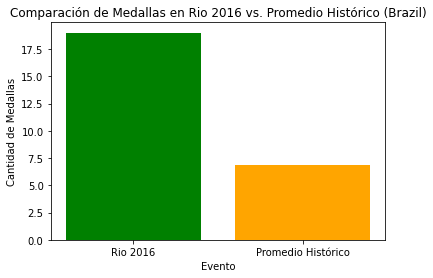

In [6]:

# Supongamos que df es tu DataFrame original con todos los datos olímpicos

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de 2016 en Río de Janeiro
df_rio_2016 = df_verano[(df_verano['Olympiad'] == 'Rio de Janeiro 2016') & (df_verano['Committee'] == 'Brazil')]

# Paso 3: Calcular el número de medallas que obtuvo Brazil en Río de Janeiro 2016
medallas_rio_2016 = df_rio_2016['Medal_type'].count()

# Paso 4: Calcular el promedio histórico de medallas para Brazil
# Excluyendo los juegos de Río de Janeiro 2016 para un promedio preciso
df_brazil_historico = df_verano[(df_verano['Committee'] == 'Brazil') & (df_verano['Olympiad'] != 'Rio de Janeiro 2016')]
medallas_historicas_brazil = df_brazil_historico['Medal_type'].count()
cantidad_olimpiadas_brazil = df_brazil_historico['Olympiad'].nunique()
promedio_historico_brazil = medallas_historicas_brazil / cantidad_olimpiadas_brazil

# Paso 5: Crear un gráfico comparando las medallas obtenidas en Río de Janeiro 2016 con el promedio histórico
plt.bar(['Rio 2016', 'Promedio Histórico'], [medallas_rio_2016, promedio_historico_brazil], color=['green', 'orange'])
plt.title('Comparación de Medallas en Rio 2016 vs. Promedio Histórico (Brazil)')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Medallas')
plt.show()

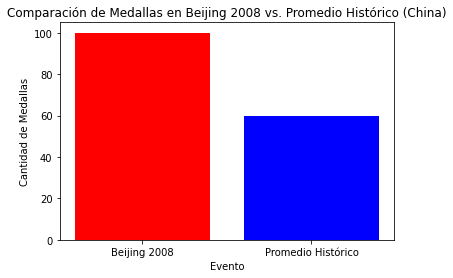

In [7]:

# Paso 1: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de verano
df_verano = df[df['Olympic_season'] == 'summer']

# Paso 2: Filtrar el DataFrame para incluir solo los datos de los Juegos Olímpicos de 2008 en Beijing
df_beijing_2008 = df_verano[(df_verano['Olympiad'] == 'Beijing 2008') & (df_verano['Committee'] == 'China')]

# Paso 3: Calcular el número de medallas que obtuvo China en Beijing 2008
medallas_beijing_2008 = df_beijing_2008['Medal_type'].count()

# Paso 4: Calcular el promedio histórico de medallas para China
# Excluyendo los juegos de Beijing 2008 para un promedio preciso
df_china_historico = df_verano[(df_verano['Committee'] == 'China') & (df_verano['Olympiad'] != 'Beijing 2008')]
medallas_historicas_china = df_china_historico['Medal_type'].count()
cantidad_olimpiadas_china = df_china_historico['Olympiad'].nunique()
promedio_historico_china = medallas_historicas_china / cantidad_olimpiadas_china

# Paso 5: Crear un gráfico comparando las medallas obtenidas en Beijing 2008 con el promedio histórico
plt.bar(['Beijing 2008', 'Promedio Histórico'], [medallas_beijing_2008, promedio_historico_china], color=['red', 'blue'])
plt.title('Comparación de Medallas en Beijing 2008 vs. Promedio Histórico (China)')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Medallas')
plt.show()